In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
business=pd.read_csv("yelp_business.csv")

In [3]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


### EDA

Let us check the rating distribution

In [4]:
x = business['stars'].value_counts().index
y = business['stars'].value_counts().values

Text(0.5,0,'Ratings ')

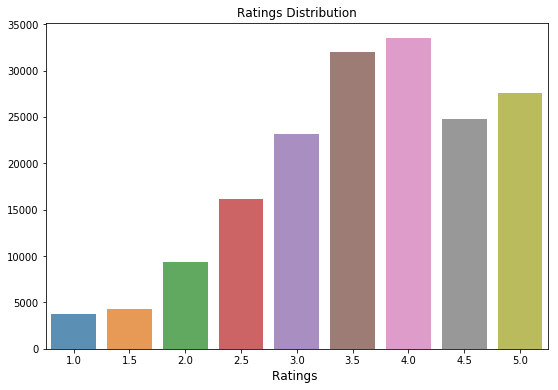

In [5]:
plt.figure(figsize=(9,6))
ax= sns.barplot(x, y,data= business ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

Let us check the review count based on the rating

Text(0.5,0,'Ratings ')

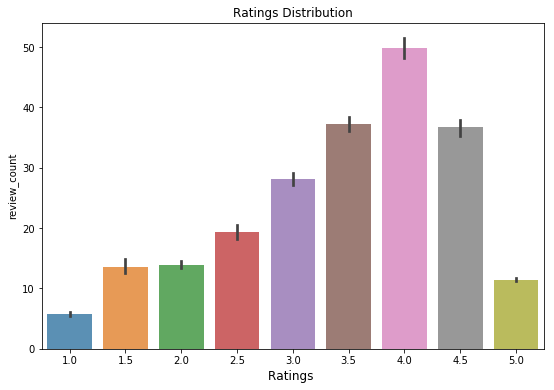

In [6]:
plt.figure(figsize=(9,6))
ax= sns.barplot(x = 'stars', y='review_count',data= business ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

In [7]:
business['categories'].head()

0    Dentists;General Dentistry;Health & Medical;Or...
1    Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2    Departments of Motor Vehicles;Public Services ...
3                              Sporting Goods;Shopping
4    American (New);Nightlife;Bars;Sandwiches;Ameri...
Name: categories, dtype: object

In [8]:
business_cat=' '.join(business['categories'])

In [9]:
categry=pd.DataFrame(business_cat.split(';'),columns=['category'])

In [10]:
x = categry.category.value_counts()

In [ ]:
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

Types of Business

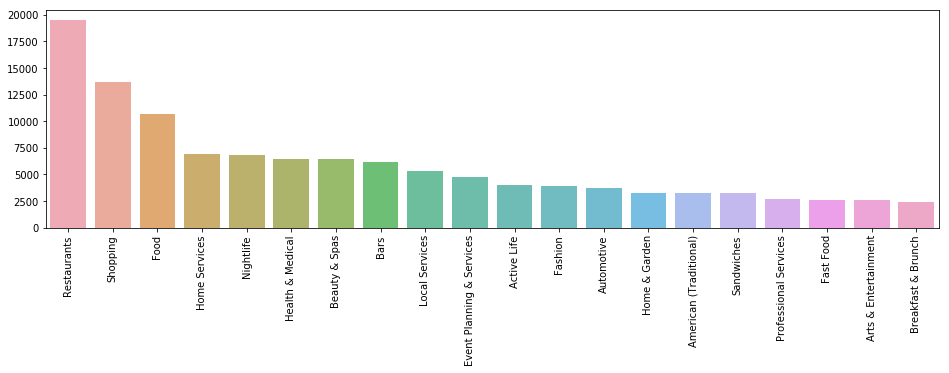

In [12]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [13]:
x = business['city'].value_counts().sort_values(ascending = False)
x=x.iloc[0:25]

Cities with most business 

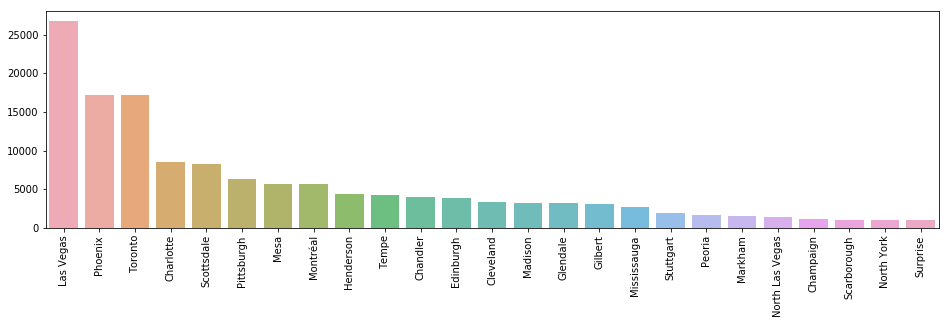

In [14]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [15]:
x = business['name'].value_counts().sort_values(ascending = False)

x=x.iloc[0:25]

Most reviwed business

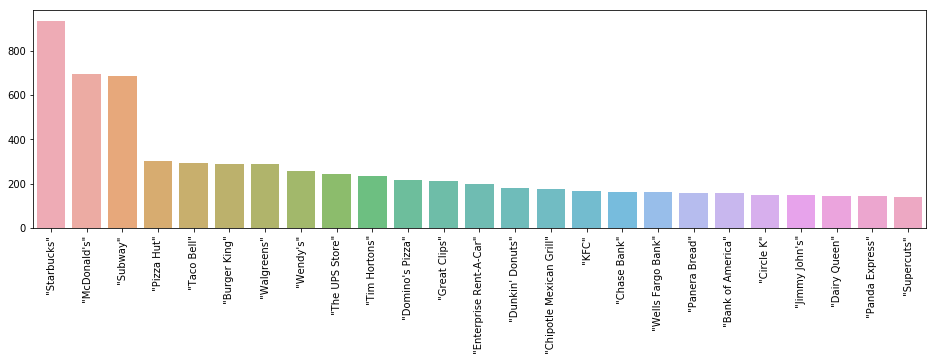

In [16]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [17]:
busi_attr = pd.read_csv('yelp_review.csv') 

In [18]:
busi_attr = busi_attr[:100000]

As the data is huge it is not possible for my system to perform analysis on the entire dataset, but if it is possible with your system try using more reviews. <br> I have selected data from 100,000 reviews.

### EDA on the reviews

In [19]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Let us create a bag of words consisting of all the reviews!

In [21]:
a = busi_attr['text'].str.lower().str.cat(sep=' ')

In [22]:
import re

In [23]:
b = re.sub('[^A-Za-z]+', ' ', a)

In [24]:
b[:1000]

'super simple place but amazing nonetheless it s been around since the s and they still serve the same thing they started with a bologna and salami sandwich with mustard staff was very helpful and friendly small unassuming place that changes their menu every so often cool decor and vibe inside their seat restaurant call for a reservation we had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains everything was incredible i could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go a bit outside of downtown montreal but take the metro out and it s less than a minute walk from the station lester s is located in a beautiful neighborhood and has been there since they are known for smoked meat which most deli s have but their brisket sandwich is what i come to montreal for they ve got about seats outside to go along with the inside the smoked meat is up there in quality and taste with schwartz 

In [25]:
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [26]:
word_tokens = word_tokenize(b)

In [27]:
len(word_tokens)

11432985

In [28]:
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [29]:
len(filtered_sentence)

5583579

After removing the stop words, we can see reduction of size by 50 percent

In [30]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]   

Let us find the most frequently used words in the reviews!

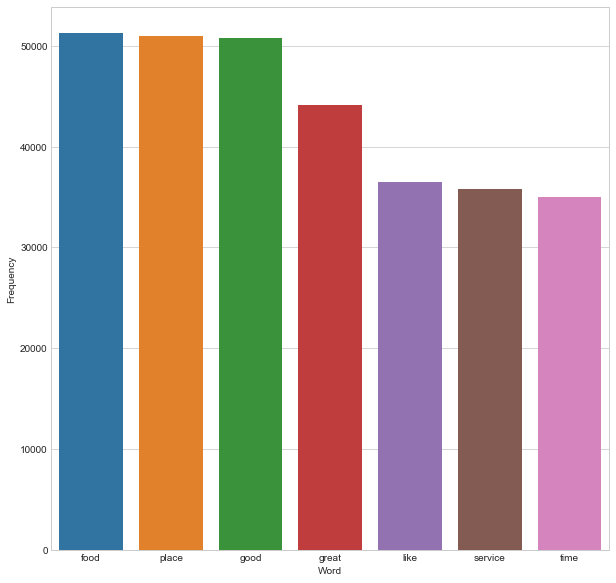

In [31]:
top_N = 100
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

Let us create a wordcloud 

In [32]:
from wordcloud import WordCloud, STOPWORDS

In [33]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

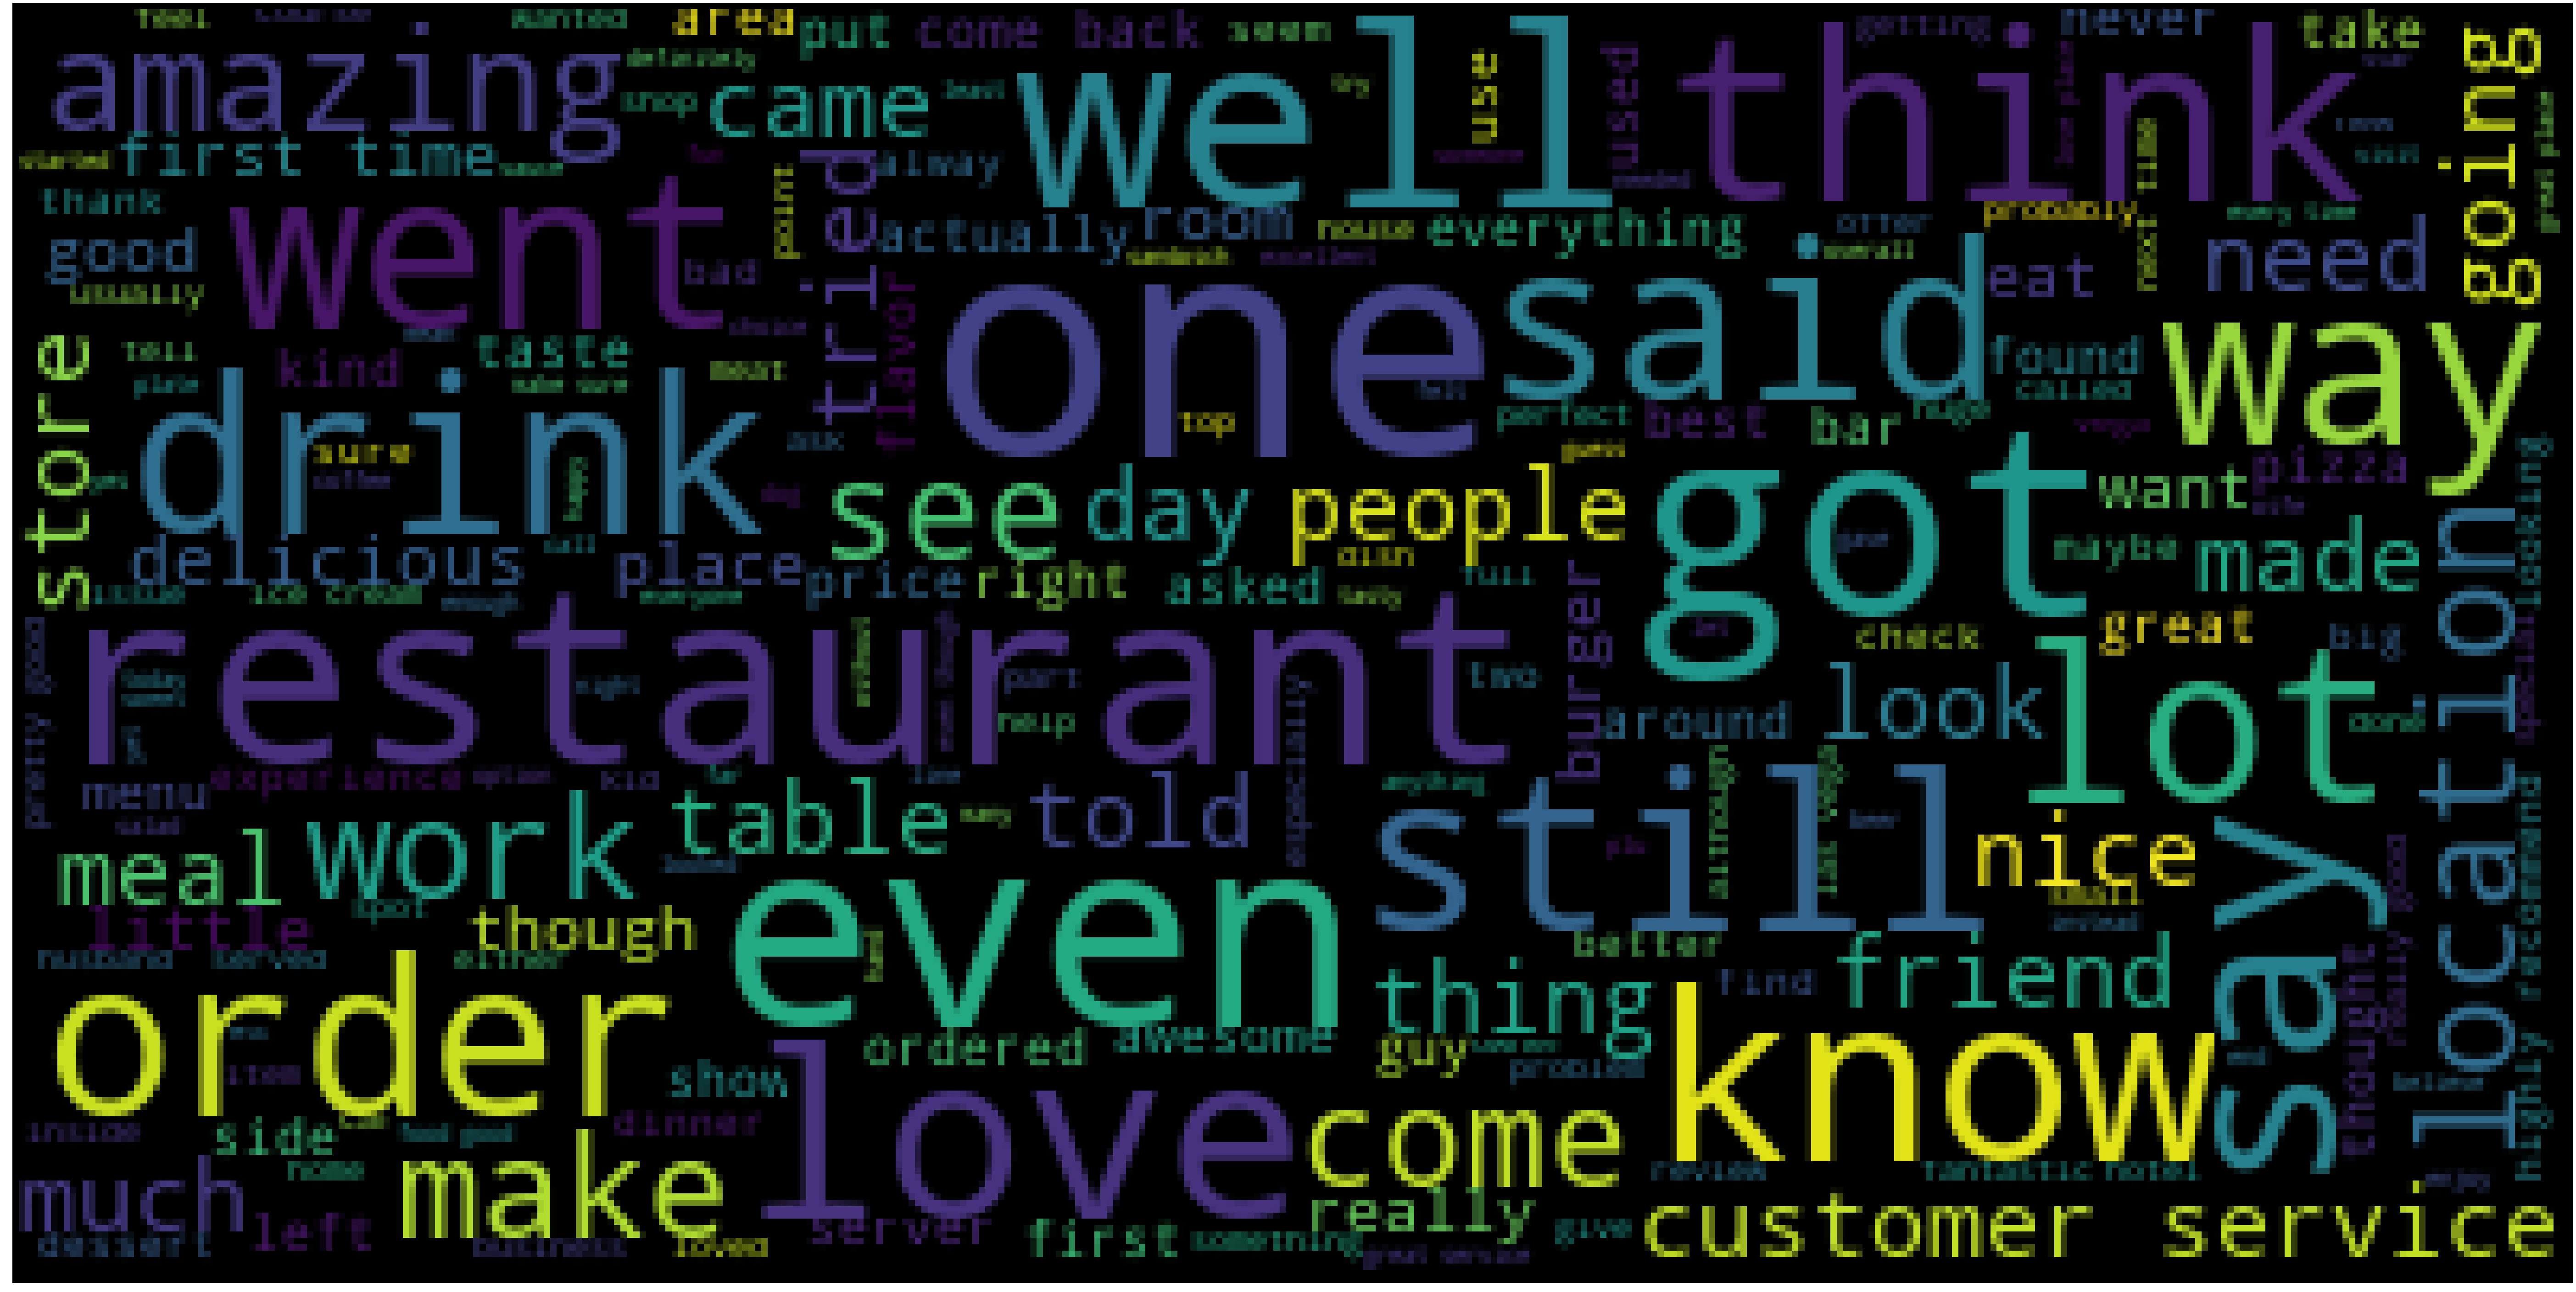

In [34]:
wc(cleaned_data_title,'black','Most Used Words')

Let us try to perform analysis on the entire review rather than all the words. For this we make use of the TextBlob

In [35]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=busi_attr['text'].astype(str)

In [36]:
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [37]:
df_polarity_desc.head()

,Review,sentiment,polarity
0,Super simple place but amazing nonetheless. It...,0.251389,0.474802
1,Small unassuming place that changes their menu...,0.291667,0.508333
2,Lester's is located in a beautiful neighborhoo...,0.295833,0.404167
3,Love coming here. Yes the place always needs t...,0.192857,0.496703
4,Had their chocolate almond croissant and it wa...,0.530000,0.700000


Based on my analysis, I have selected these values however you could use based on your insights

In [38]:
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

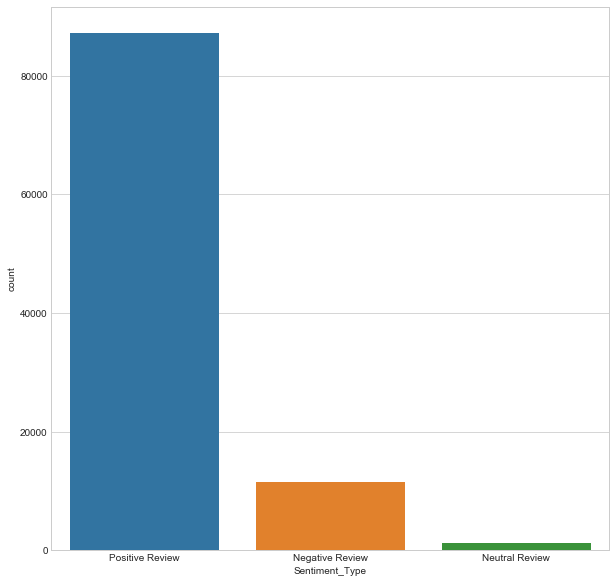

In [39]:
df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [40]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [41]:
negative_reviews.head()

,Review,sentiment,polarity,Sentiment_Type
11,Server was a little rude.\n\nOrdered the calam...,-0.090833,0.480000,Negative Review
16,I too have been trying to book an appt to use ...,-0.055556,0.555556,Negative Review
19,really excited to hear of this restaurant comi...,-0.066947,0.602101,Negative Review
23,Food is very bland - not authentic at all.\n\n...,-0.155556,0.750000,Negative Review
25,Service is really slow here. I waited for over...,-0.104545,0.333333,Negative Review


Let us look at the wordcloud of the most used words in a positive review

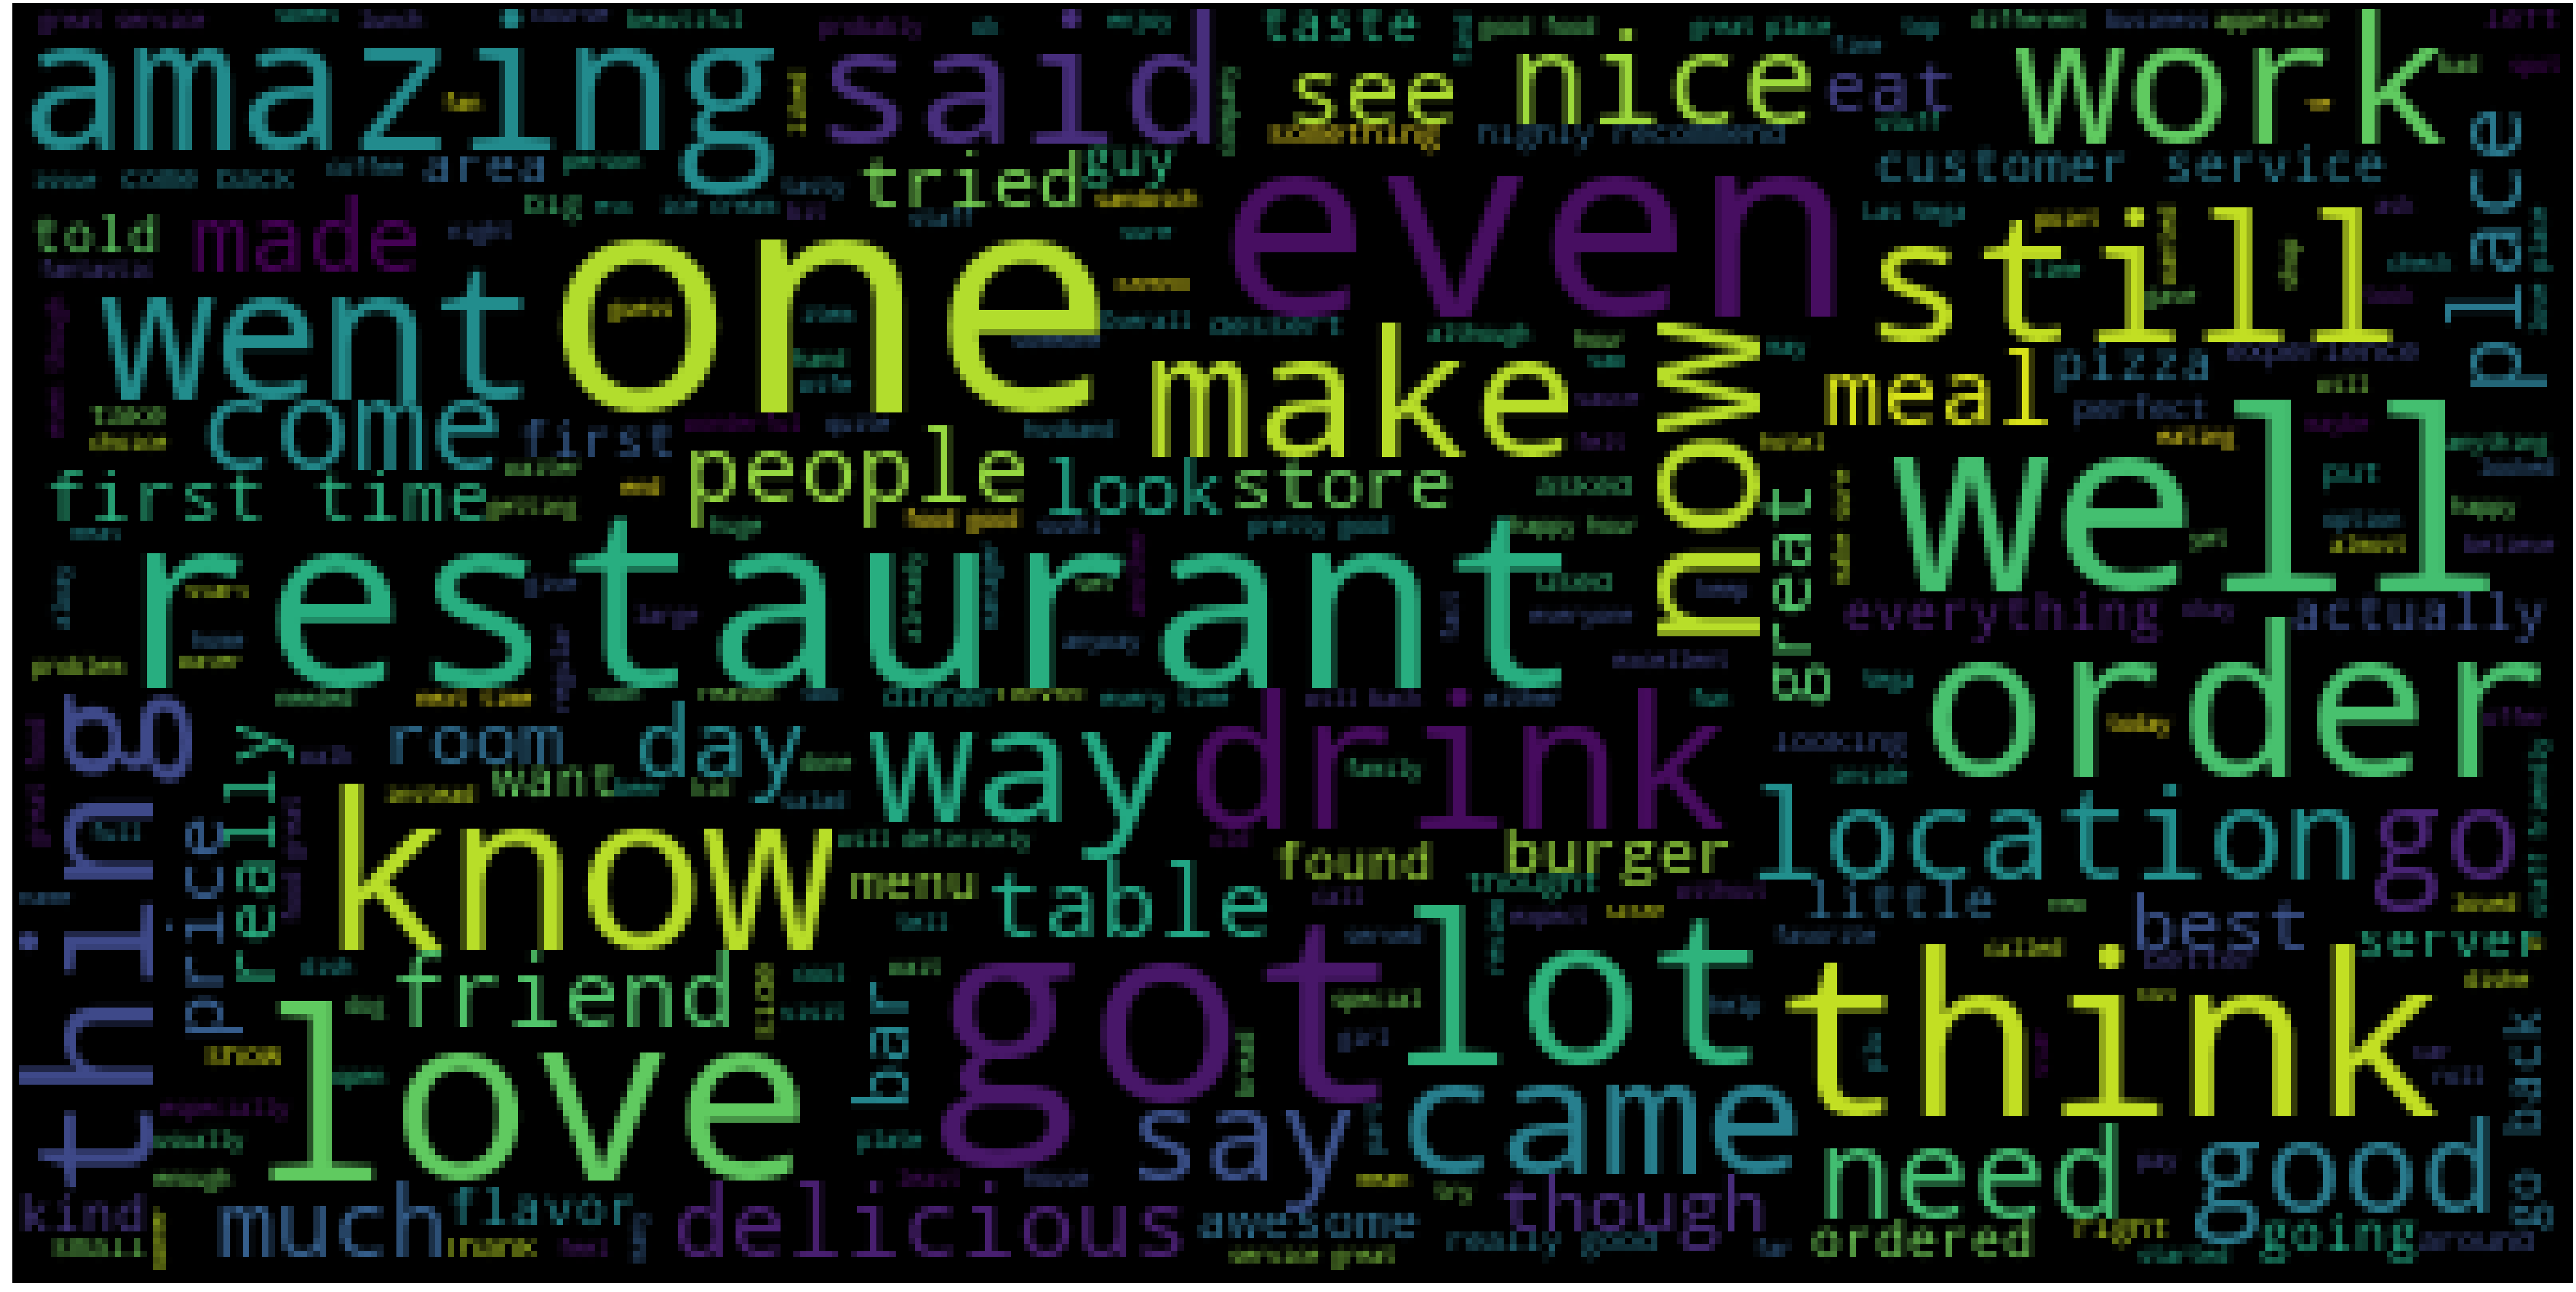

In [42]:
wc(positive_reviews['Review'],'black','Most Used Words')

Let us look at the wordcloud of the most used words in a negative review

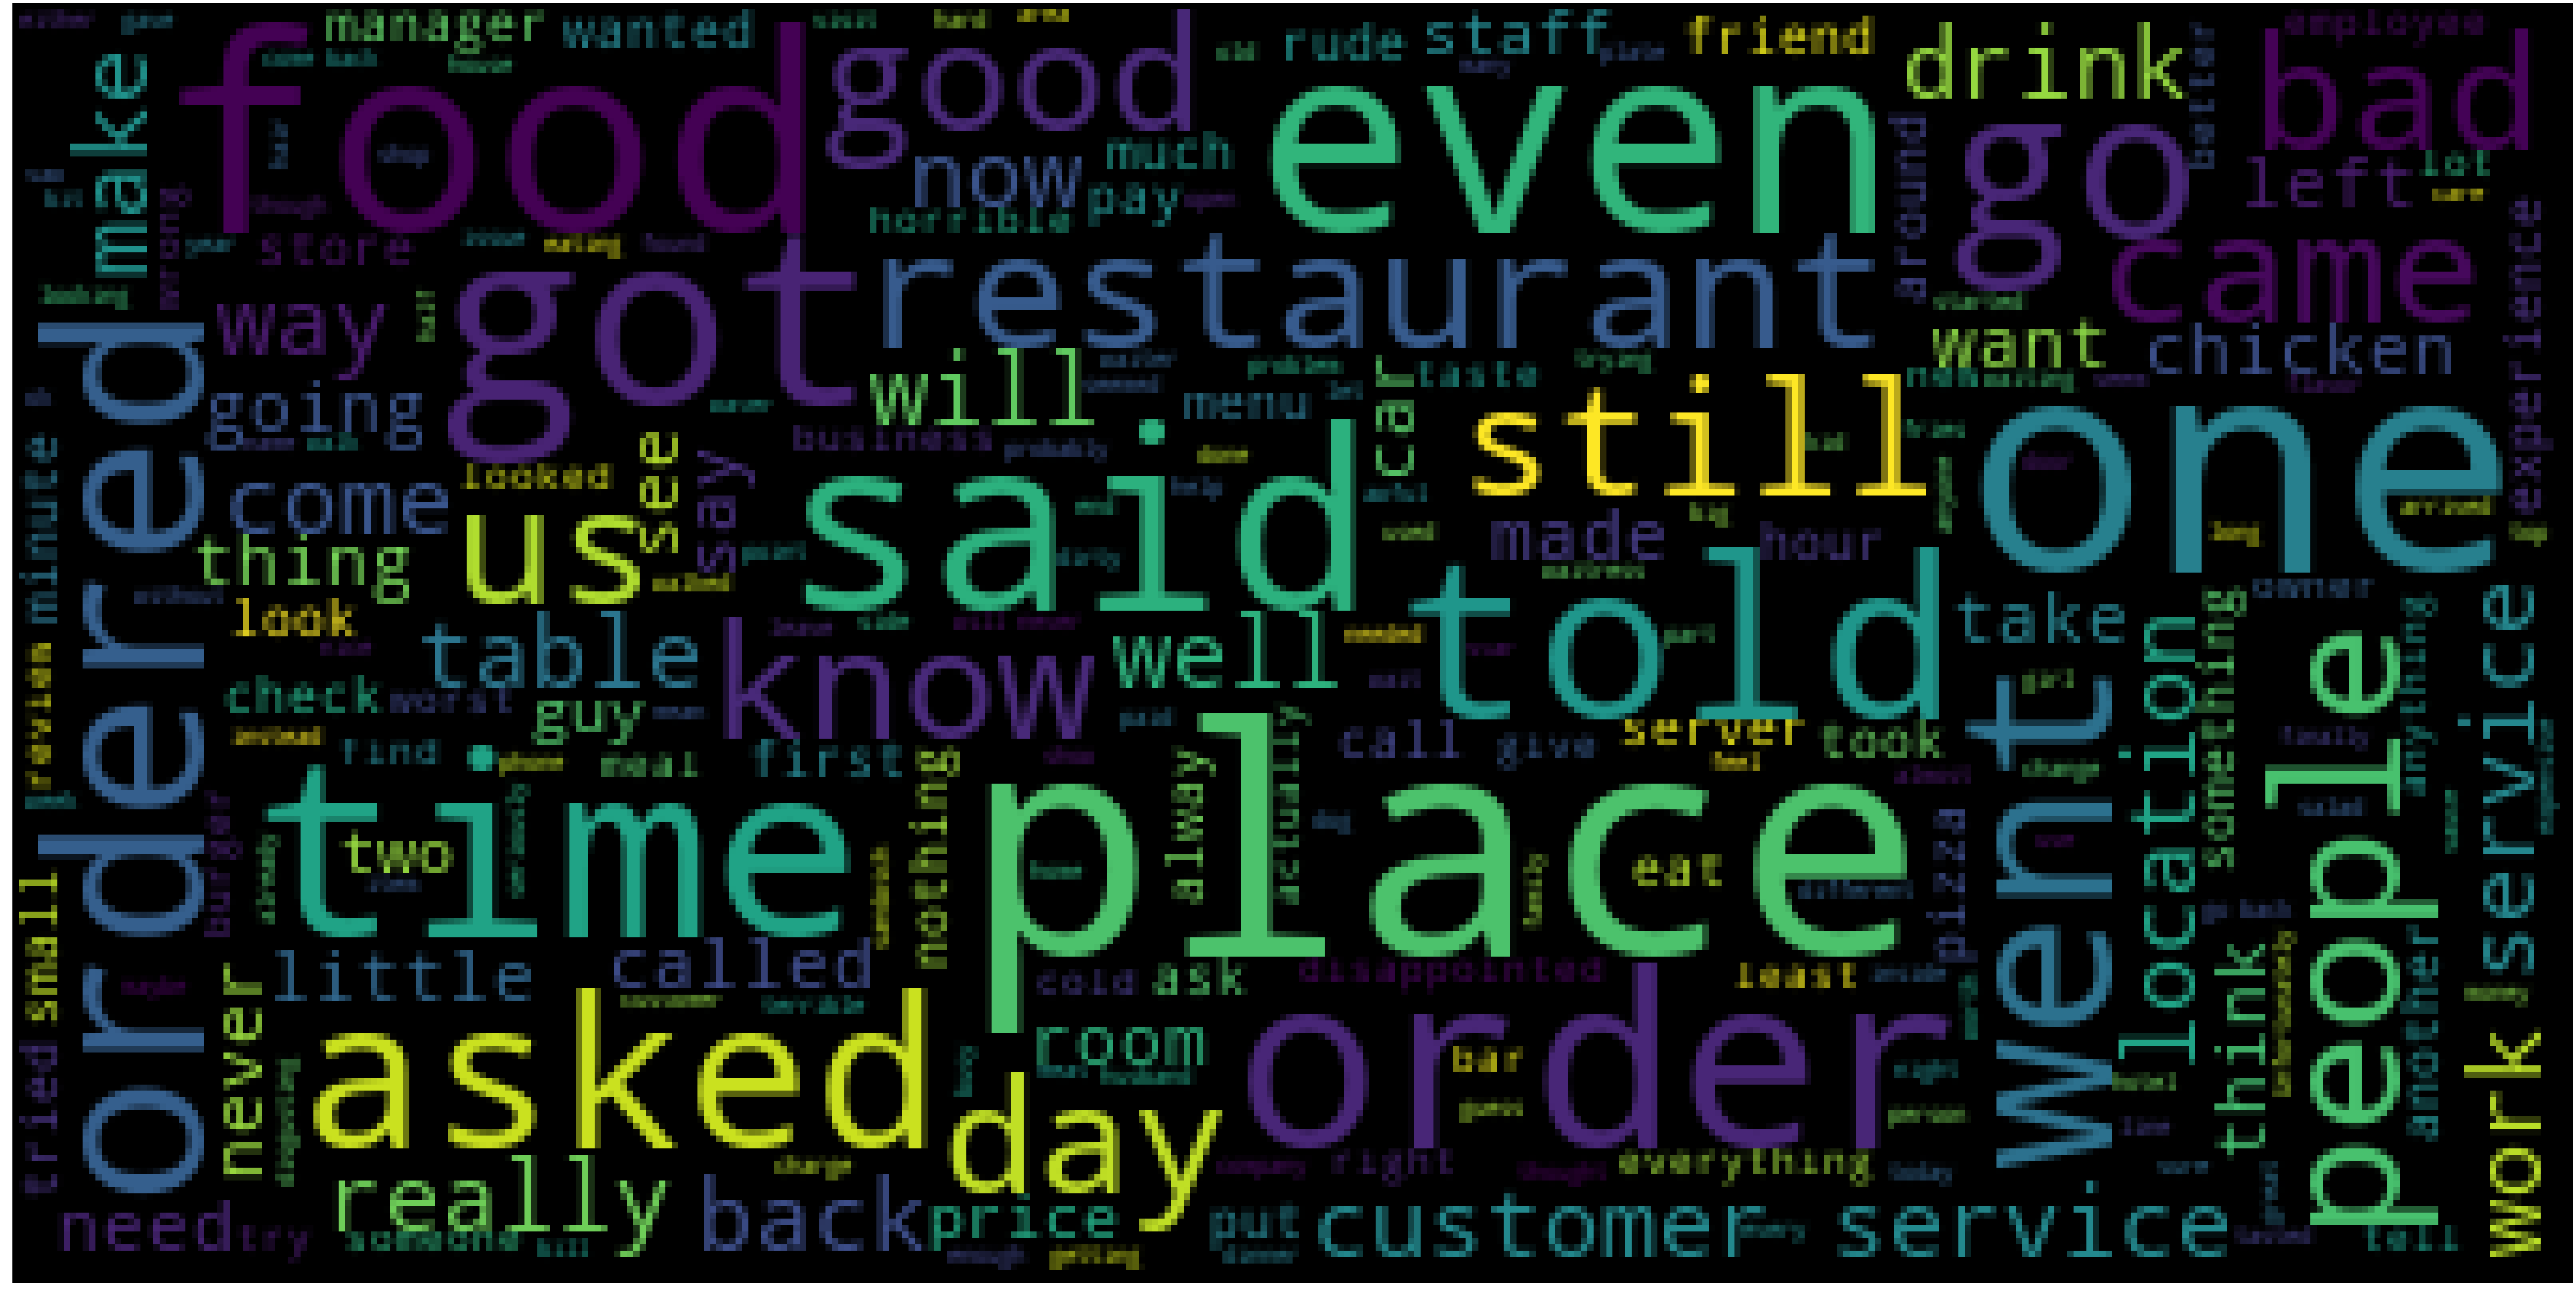

In [43]:
wc(negative_reviews['Review'],'black','Most Used Words')

### Using machine learning to predict whether a review has 1 star rating or 5 star rating

Let us now train a model We are taking only review with ratings 1 and 5 to perform the analysis to make the analysis more simple.

In [44]:
busi_attr=busi_attr.dropna(axis=0,how='any')
rating_class = busi_attr[(busi_attr['stars'] == 1) | (busi_attr['stars'] == 5)]
X_review=rating_class['text']
y=rating_class['stars']

In [45]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [47]:
X_review = bow_transformer.transform(X_review)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [60]:
X_train

<39190x103863 sparse matrix of type '<class 'numpy.int64'>'
	with 1790889 stored elements in Compressed Sparse Row format>

Using SVM

In [76]:
from sklearn.svm import SVC
sv_model = SVC()
sv_model.fit(X_train, y_train)
Y_pred = sv_model.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, Y_pred))
print('\n Accuracy:')
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[   64  3887]
 [    0 12845]]

 Accuracy:
0.7685758513931888
             precision    recall  f1-score   support

          1       1.00      0.02      0.03      3951
          5       0.77      1.00      0.87     12845

avg / total       0.82      0.77      0.67     16796



Using Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
Y_pred = lg_model.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, Y_pred))
print('\n Accuracy:')
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[ 3566   385]
 [  218 12627]]

 Accuracy:
0.9640985949035484
             precision    recall  f1-score   support

          1       0.94      0.90      0.92      3951
          5       0.97      0.98      0.98     12845

avg / total       0.96      0.96      0.96     16796



Using Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
predict=nb.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predict))
print('\n Accuracy:')
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

[[ 3474   477]
 [  550 12295]]

 Accuracy:
0.9388544891640866
             precision    recall  f1-score   support

          1       0.86      0.88      0.87      3951
          5       0.96      0.96      0.96     12845

avg / total       0.94      0.94      0.94     16796



We can see we have the best accuracy with Logistic regression. 


In SVM the given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes the new examples.

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Naïve Bayes is probabilistic in nature, while the SVM one is geometric.

The features point of view is that Naive Bayes treats them as independent, whereas SVM looks at the interactions.




Naive Bayes classifier (nBc) makes two bold assumptions:
1)The probability of occurrence of any word given the class label, is independent of the probability of occurrence of any other word, given that label.
2)The probability of occurrence of a word in a document, is independent of the location of that word within the document(!).

Logistic regression measures the relationship between a output variable Y (categorical) and one or more independent variables, which are usually (but not necessarily) continuous, by using probability scores as the predicted values of the dependent variable.

In short Naive Bayes has a higher bias but lower variance compared to logistic regression. If the data set follows the bias then Naive Bayes will be a better classifier. 

